<a href="https://colab.research.google.com/github/FlintyTub49/Sem_V-Machine-Learning/blob/master/Exercise%207/Exercise%207%20Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('train.csv')

## Preprocessing

### Plotting a heatmap for the correlation between the variables 

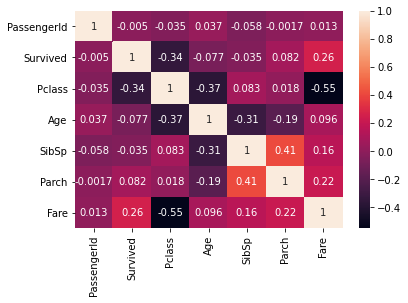

In [3]:
sns.heatmap(train.corr(), annot = True)

### Seeing the missing data and its data types

In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Dropping Passenger ID, Name and Ticket

In [5]:
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Seeing remainder of missing Values

In [6]:
 def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

In [7]:
missing_values_table(train)

,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


### Since the Cabin variable has a lot of missing values, we drop it

In [8]:
train = train.drop(['Cabin'], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Replace the missing age values with the mean of rest of ages

In [9]:
train['Age'].fillna(train['Age'].mean(), inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Dropping the rows with na values in Embarked

In [10]:
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


### Making Categories for Age

In [11]:
cut_labels = [0, 1, 2, 3]
cut_bins = [0, 13, 18, 60, 80]
train['age_cat'] = pd.cut(train['Age'], bins = cut_bins, labels = cut_labels)
train = train.drop('Age', axis = 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    object  
 3   SibSp     889 non-null    int64   
 4   Parch     889 non-null    int64   
 5   Fare      889 non-null    float64 
 6   Embarked  889 non-null    object  
 7   age_cat   889 non-null    category
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 56.6+ KB


### Converting PClass, Sex and Embarked to category data type

In [12]:
train['Pclass'] = train['Pclass'].astype('category')
train['Sex'] = train['Sex'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    category
 2   Sex       889 non-null    category
 3   SibSp     889 non-null    int64   
 4   Parch     889 non-null    int64   
 5   Fare      889 non-null    float64 
 6   Embarked  889 non-null    category
 7   age_cat   889 non-null    category
dtypes: category(4), float64(1), int64(3)
memory usage: 38.7 KB


### Making a new column for total family

In [13]:
# train['FamilyS'] = train['SibSp'] + train['Parch'] + 1
# train['IsAlone'] = 1
# train['IsAlone'].loc[train['FamilyS'] > 1] = 0
# train.info()

### One hot encoding all categorical variables

In [14]:
train = pd.get_dummies(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   SibSp       889 non-null    int64  
 2   Parch       889 non-null    int64  
 3   Fare        889 non-null    float64
 4   Pclass_1    889 non-null    uint8  
 5   Pclass_2    889 non-null    uint8  
 6   Pclass_3    889 non-null    uint8  
 7   Sex_female  889 non-null    uint8  
 8   Sex_male    889 non-null    uint8  
 9   Embarked_C  889 non-null    uint8  
 10  Embarked_Q  889 non-null    uint8  
 11  Embarked_S  889 non-null    uint8  
 12  age_cat_0   889 non-null    uint8  
 13  age_cat_1   889 non-null    uint8  
 14  age_cat_2   889 non-null    uint8  
 15  age_cat_3   889 non-null    uint8  
dtypes: float64(1), int64(3), uint8(12)
memory usage: 45.1 KB


## Model Building

### Splitting X and Y variables

In [15]:
x = train.drop('Survived', axis = 1)
y = train['Survived']

### Splitting data into train, dev and test set

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(y_train.shape)
# print(x_dev.shape)
# print(y_dev.shape)
print(x_test.shape)
print(y_test.shape)

(711, 15)
(711,)
(178, 15)
(178,)


### Defining The Classifier Models

In [17]:
logistics = linear_model.LogisticRegression()
sgd = linear_model.SGDClassifier()
passagg = linear_model.PassiveAggressiveClassifier()
ridgecv = linear_model.RidgeClassifierCV()
ridgeclass = linear_model.RidgeClassifier()

models_log = [logistics, sgd, passagg, ridgecv, ridgeclass]

### Defining A Cross Val Function To Be Called Several Times

In [18]:
def get_cv_scores(model):
    scores = cross_val_score(model, x_train, y_train, cv = 10, scoring='accuracy')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [19]:
for i in models_log:
    print(i)
    get_cv_scores(i)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
CV Mean:  0.8030125195618154
STD:  0.033664173486319345


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
CV Mean:  0.7522887323943662
STD:  0.07217043001161827


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=Tr

### Defining the parameters for GridSearch CV

In [20]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

In [21]:
grid = GridSearchCV(estimator = logistics, param_grid = param_grid, scoring='accuracy', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
pred = grid.predict(x_test)
accuracy_score(y_test, pred)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.9s finished


0.7865168539325843

### Trying to get a better accuracy with Neural Networks

In [22]:
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

In [23]:
nn = models.Sequential()
nn.add(layers.Dense(1024, activation="relu",input_shape=(15,)))
nn.add(layers.Dense(512, activation="relu"))
nn.add(layers.Dense(256, activation="relu"))
nn.add(layers.Dense(128, activation="relu"))
nn.add(layers.Dense(1, activation="sigmoid"))
nn.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [24]:
filepath = "Best Model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', save_best_only = True, mode='max', verbose = 1)
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 50, verbose = 1)
call_list = [checkpoint, es]
nn.fit(x_train, y_train, epochs = 1000, batch_size = 200, validation_split = 0.3, callbacks = call_list)

Epoch 1/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7381 - accuracy: 0.3550
Epoch 00001: val_accuracy improved from -inf to 0.39252, saving model to Best Model.hdf5
3/3 [==============================] - 0s 68ms/step - loss: 2.5087 - accuracy: 0.5010 - val_loss: 1.9639 - val_accuracy: 0.3925
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2887 - accuracy: 0.4150
Epoch 00002: val_accuracy improved from 0.39252 to 0.61215, saving model to Best Model.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 1.4733 - accuracy: 0.4990 - val_loss: 0.9241 - val_accuracy: 0.6121
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1783 - accuracy: 0.5950
Epoch 00003: val_accuracy did not improve from 0.61215
3/3 [==============================] - 0s 7ms/step - loss: 1.0603 - accuracy: 0.5211 - val_loss: 0.7069 - val_accuracy: 0.5748
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6490 - accuracy: 0.6100
Epoch

In [25]:
saved_model = load_model('Best Model.hdf5')
saved_model.evaluate(x_test, y_test)[1]

6/6 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.8090


0.8089887499809265

### Trying Random Forest Classifier - Experimental

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(x_train,y_train)
prediction_rm = model.predict(x_test)
accuracy_score(y_test, prediction_rm)

0.8089887640449438

### Trying SVM - Experimental

In [27]:
from sklearn.svm import SVC, LinearSVC

model_svc = SVC()
model_svc.fit(x_train, y_train)
prediction_svm=model_svc.predict(x_test)
accuracy_score(y_test, prediction_svm)

0.6797752808988764

Since our best model yet was with Logistic Regression, we consider it to be the best model and find the accuracy on the test data set.

In [28]:
logistics.fit(x_train, y_train)

# pred_logi_dev = logistics.predict(x_dev)
# print(accuracy_score(y_dev, pred_logi_dev))

pred_logi_test = logistics.predict(x_test)
print(accuracy_score(y_test, pred_logi_test))

0.7921348314606742


The hyperparamters of our model are :-<br>

C = 1.0 <br>
class_weight = None<br>
dual = False<br>
fit_intercept = True<br>
intercept_scaling = 1 <br>
l1_ratio = None<br>
max_iter = 100<br>
multi_class = 'auto'<br>
n_jobs  =None<br>
penalty = 'l2'<br>
random_state = None <br>
solver = 'lbfgs'<br>
tol = 0.0001<br>
verbose = 0<br>
warm_start = False<br>